In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 0
with open('model/keypoint_classifier/keypoint_classifier_label.csv',encoding='utf-8-sig') as f:
    reader = csv.reader(f)
    data = list(reader)
    NUM_CLASSES = len(data)
print(NUM_CLASSES)

39


# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (42 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.85, random_state=RANDOM_SEED)



# Model building

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((42 * 2, )),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(42, activation='relu'),
    #tf.keras.layers.Dropout(0.4),
   # tf.keras.layers.Dense(21, activation='relu'),
    #tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    #tf.keras.layers.Dense(5, activation='relu'),
    #tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 42)                3570      
                                                                 
 dense_8 (Dense)             (None, 10)                430       
                                                                 
 dense_9 (Dense)             (None, 20)                220       
                                                                 
 dense_10 (Dense)            (None, 39)                819       
                                                                 
Total params: 5,039
Trainable params: 5,039
Non-trainable params: 0
_________________________________________________________________


In [26]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [27]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [28]:
model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=1000,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback],
)

Epoch 1/1000
438/449 [============================>.] - ETA: 0s - loss: 1.6087 - accuracy: 0.5409
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
449/449 [==============================] - 3s 3ms/step - loss: 1.5836 - accuracy: 0.5480 - val_loss: 0.5122 - val_accuracy: 0.8740
Epoch 2/1000
433/449 [===========================>..] - ETA: 0s - loss: 0.2405 - accuracy: 0.9551
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
449/449 [==============================] - 1s 3ms/step - loss: 0.2360 - accuracy: 0.9562 - val_loss: 0.1071 - val_accuracy: 0.9878
Epoch 3/1000
439/449 [============================>.] - ETA: 0s - loss: 0.0653 - accuracy: 0.9912
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
449/449 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9912 - val_loss: 0.0560 - val_accuracy: 0.9936
Epoch 4/1000
445/449 [============================>.] - ETA: 0s - loss: 0.0356 - accu

Epoch 28/1000
448/449 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9995
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
449/449 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0205 - val_accuracy: 0.9988
Epoch 29/1000
447/449 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9996
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
449/449 [==============================] - 1s 3ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0206 - val_accuracy: 0.9989
Epoch 30/1000
433/449 [===========================>..] - ETA: 0s - loss: 0.0020 - accuracy: 0.9995
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
449/449 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0203 - val_accuracy: 0.9985
Epoch 31/1000
446/449 [============================>.] - ETA: 0s - loss: 0.0024

In [29]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

80/80 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9987


In [30]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [31]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))
x = np.argmax(np.squeeze(predict_result))
print(np.squeeze(predict_result)[x])

1/1 [==============================] - 0s 109ms/step
[6.4155156e-17 2.2320956e-17 1.8188206e-37 0.0000000e+00 0.0000000e+00
 2.7038173e-23 2.3938725e-20 2.4437047e-28 2.5409429e-29 0.0000000e+00
 3.1357045e-31 3.0624723e-37 1.0493045e-23 5.0026716e-29 2.4655198e-11
 1.7023959e-09 4.2953147e-30 4.8782222e-27 1.5271127e-09 4.2769244e-21
 2.4822766e-25 7.4924252e-08 0.0000000e+00 0.0000000e+00 8.1539264e-10
 9.9999774e-01 0.0000000e+00 0.0000000e+00 2.0972236e-06 3.2229609e-16
 1.4821080e-10 3.1139973e-16 5.3231052e-13 5.7229230e-19 2.3524249e-09
 3.3863729e-36 5.4208325e-20 1.2021658e-09 1.8937351e-23]
25
0.99999774


# Confusion matrix

317/317 [==============================] - 0s 1ms/step


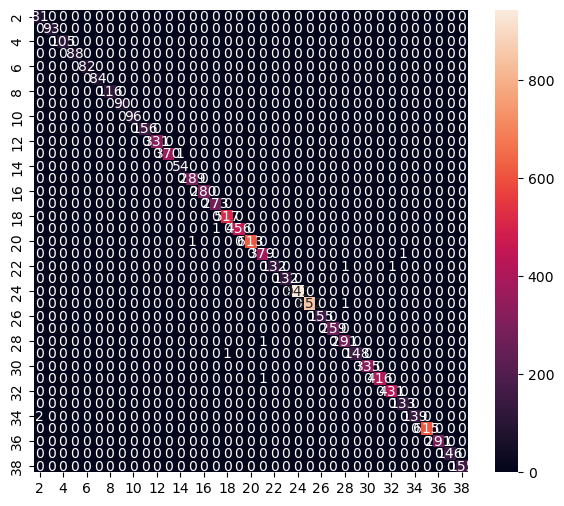

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.98      1.00      0.99        81
           3       1.00      1.00      1.00        93
           4       1.00      1.00      1.00       105
           5       1.00      1.00      1.00        88
           6       1.00      1.00      1.00        82
           7       1.00      1.00      1.00        84
           8       1.00      1.00      1.00       116
           9       1.00      1.00      1.00        90
          10       1.00      1.00      1.00        96
          11       1.00      1.00      1.00       156
          12       1.00      1.00      1.00       331
          13       1.00      1.00      1.00       371
          14       0.98      1.00      0.99        54
          15       1.00      1.00      1.00       289
          16       1.00      1.00      1.00       280
          17       1.00      1.00      1.00       273
     

C:\Users\kaka1\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaka1\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaka1\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [33]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [34]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\kaka1\AppData\Local\Temp\tmp6jn_dzqo\assets


INFO:tensorflow:Assets written to: C:\Users\kaka1\AppData\Local\Temp\tmp6jn_dzqo\assets


12208

# Inference test

In [35]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [36]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [37]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [38]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [39]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.6200788e-17 1.8901254e-17 1.3219351e-37 0.0000000e+00 0.0000000e+00
 2.6613504e-23 2.1515175e-20 2.1287398e-28 2.0061601e-29 0.0000000e+00
 2.6692091e-31 2.2947536e-37 9.0856526e-24 4.4239125e-29 2.3789222e-11
 1.5637744e-09 4.0671578e-30 3.8845429e-27 1.4990817e-09 3.3365824e-21
 2.2982368e-25 7.2902331e-08 0.0000000e+00 0.0000000e+00 6.9741984e-10
 9.9999785e-01 0.0000000e+00 0.0000000e+00 2.0663422e-06 2.9744144e-16
 1.4438427e-10 2.9702645e-16 5.2031491e-13 5.3288190e-19 2.2378341e-09
 2.8583210e-36 4.8425861e-20 1.2454142e-09 1.7485951e-23]
25
